In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from datetime import datetime
import statsmodels
from matplotlib.pylab import rcParams

import calendar 
import scipy



%matplotlib inline 

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df=pd.read_csv('/root/Downloads/AirPassengers.csv', parse_dates=['Month'],index_col='Month',date_parser=dateparse)



In [3]:
df.dtypes

#Passengers    int64
dtype: object

In [4]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


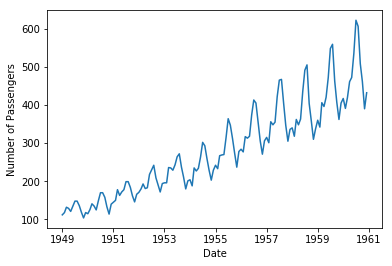

In [5]:
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.plot(df)

In [6]:
df.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.dtypes

#Passengers    int64
dtype: object

In [8]:
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()

In [9]:
print (rolmean,rolstd)


            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

### Often time series analysis requires the data to be stationary , that is constant average , constant standard deviation an autocovariance that does not depend on time. To determine this often we can calculate the rolling standard deviation , rolling mean , plot and visualise it as we did above. 

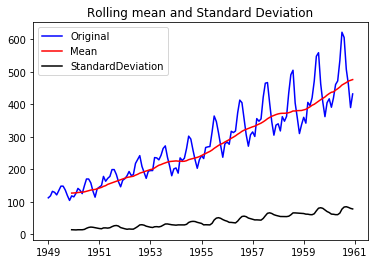

In [10]:
orig = plt.plot(df,color='blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Mean')
std = plt.plot(rolstd,color = 'black', label= 'StandardDeviation')
plt.legend(loc='best')
plt.title("Rolling mean and Standard Deviation")
plt.show(block=False)


### Another test we can do to test the stationarity of the data can be done using Adfuller test. 

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
dftest = adfuller(df['#Passengers'], autolag='AIC')

In [13]:
dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','p-value', '#Lags-Used', 'Number of Observations used'])


In [14]:
dfoutput

Test Statistic                   0.815369
p-value                          0.991880
#Lags-Used                      13.000000
Number of Observations used    130.000000
dtype: float64

In [15]:
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    

In [16]:
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags-Used                      13.000000
Number of Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### From the values above we can easily duduct that the values are not stationary based on the fact that the p-value is very large we are supposed to have a small one say belowe 0.5. 

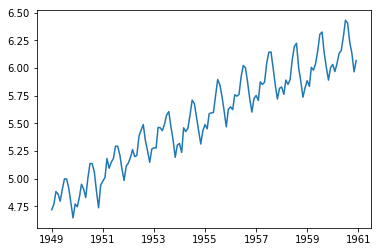

In [17]:
##The trend 

df_trend_log = np.log(df)
plt.plot(df_trend_log)

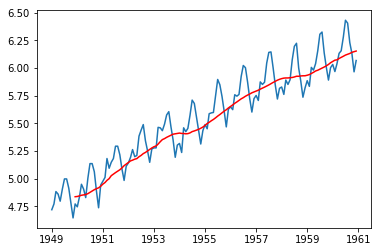

In [18]:
##We can do similar rolling average and rolling standard deviation 

logrollingave = df_trend_log.rolling(window=12).mean()
logrollingstd = df_trend_log.rolling(window=12).std()

plt.plot(df_trend_log)
plt.plot(logrollingave,color='red')
#plt.plot(logrollingstd)
#plot(kind='line', x='a',y='b', use_index=False)
plt.show(block=False)

In [19]:
Logmovingaveragediff = df_trend_log-logrollingave

In [20]:
Logmovingaveragediff.head(13)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [21]:
Logmovingaveragediff.dropna(inplace = True)

In [22]:
Logmovingaveragediff.head()


,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


#### From the calculations above we can realise that the timseries is much more stationary because its not going up but instead its just stationary that is the average is constant, standard deviaition is as well constant. This can be visualized below in the plot. 
plt.plot(Logmovingaveragediff)

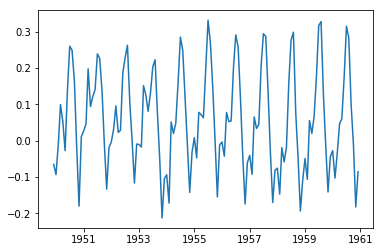

In [23]:
plt.plot(Logmovingaveragediff)

In [130]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


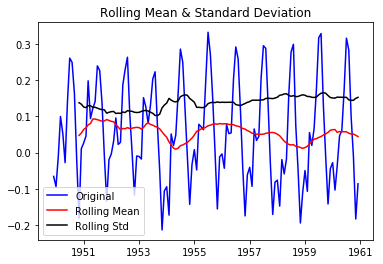

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
Critical Value (1%)             -3.486535
dtype: float64


In [131]:
test_stationarity(Logmovingaveragediff)


#### From the results above we can easily note that the p-value has significantly decreased , the critical values are almost the same and so the data has almost been stationarised. But we can do better with weighted moving averages, this approach tends to do better stationarization than the previous method. So in the system below we are going to be using weights. 

In [139]:
expwighted_avg = pd.ewma(df_trend_log, halflife=12)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,halflife=12,min_periods=0,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


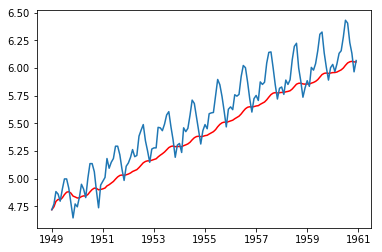

In [143]:
plt.plot(expwighted_avg, color='red', label = 'WeightedData')
plt.plot(df_trend_log,label='OriginalData')

In [145]:
ts_log_ewma_diff = df_trend_log - expwighted_avg

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


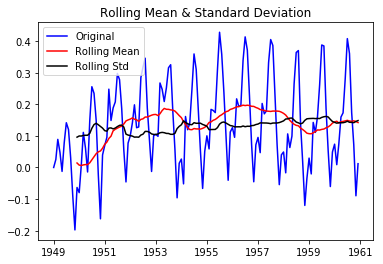

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
Critical Value (1%)             -3.481682
dtype: float64


In [147]:
test_stationarity(ts_log_ewma_diff)

#### From the data above we can easily note that the values are pretty small in terms of the p-value , Critital values and the rest. So we can easily say that we have some good stationarity of the data. Below we are going to deal with trend and seasonality models. This is going to be done using Differencing and Decomposition. 

## Defferencing 

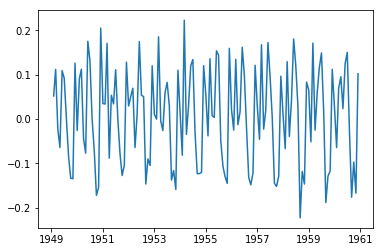

In [148]:
ts_log_diff = df_trend_log - df_trend_log.shift()
plt.plot(ts_log_diff)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


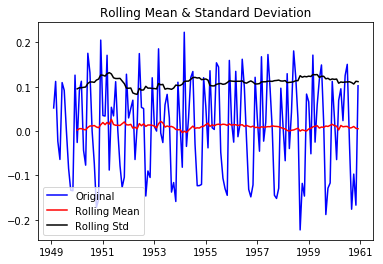

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
Critical Value (1%)             -3.482501
dtype: float64


In [151]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

#### From the graphic above we can note that the rolling and standard deviation lines are becoming more straight. So in essence we are having more of stationarity being achieved

## Decomposition 


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


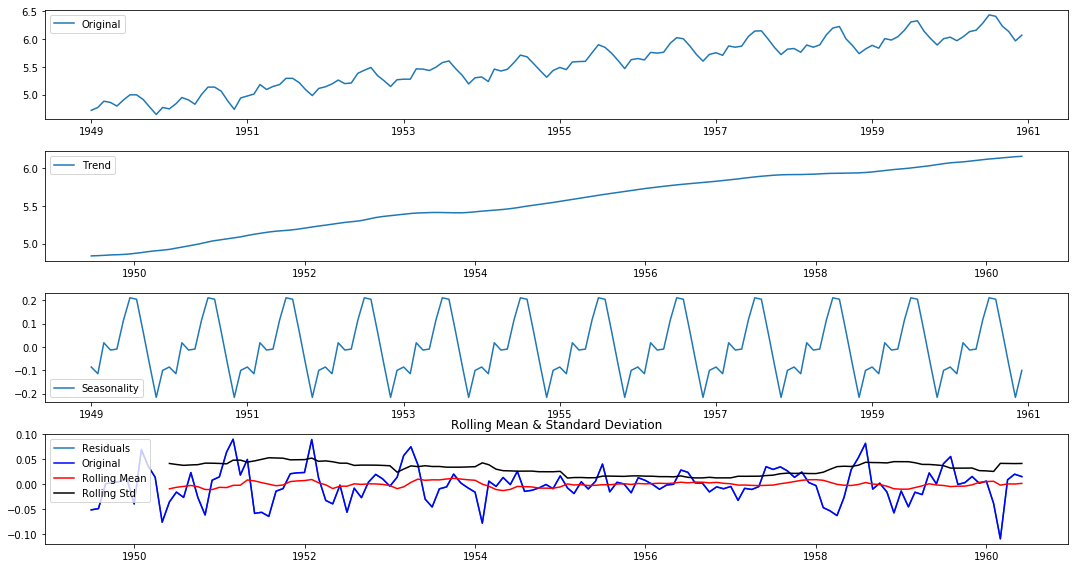

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
Critical Value (1%)           -3.485122e+00
dtype: float64


In [166]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_trend_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(df_trend_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decopose = residual
decopose.dropna(inplace=True)
test_stationarity(decopose)




In [167]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf


In [169]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

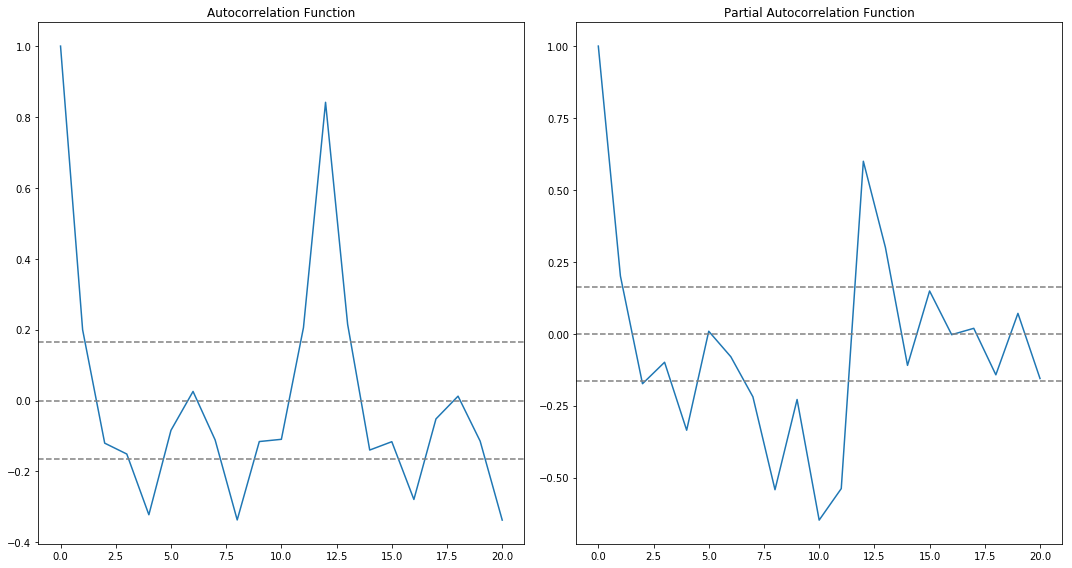

In [173]:
#Plot ACF: 
plt.figure(figsize=(15,8))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [179]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


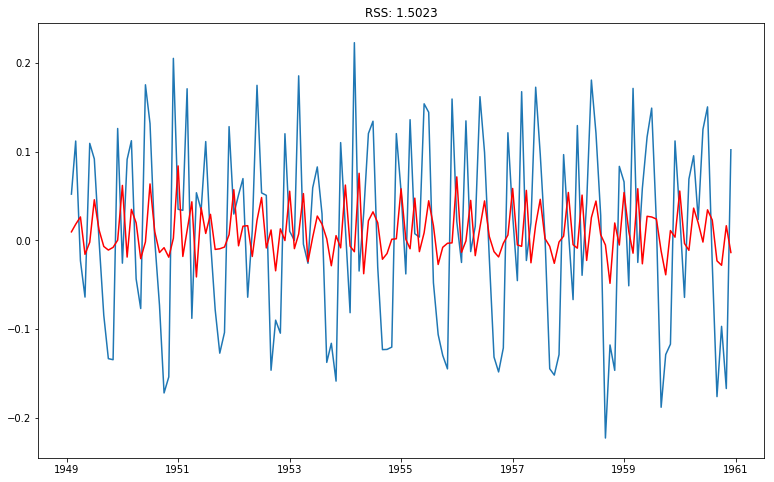

In [181]:
model = ARIMA(df_trend_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1) 
plt.figure(figsize=(13,8))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff['#Passengers'])**2))

# MA Model


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


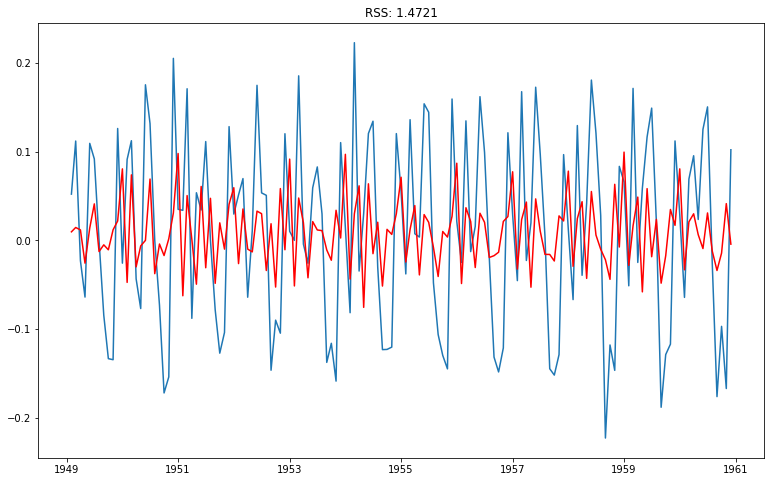

In [182]:
#MA Model 
model = ARIMA(df_trend_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(13,8))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff['#Passengers'])**2))

# Combined Model


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


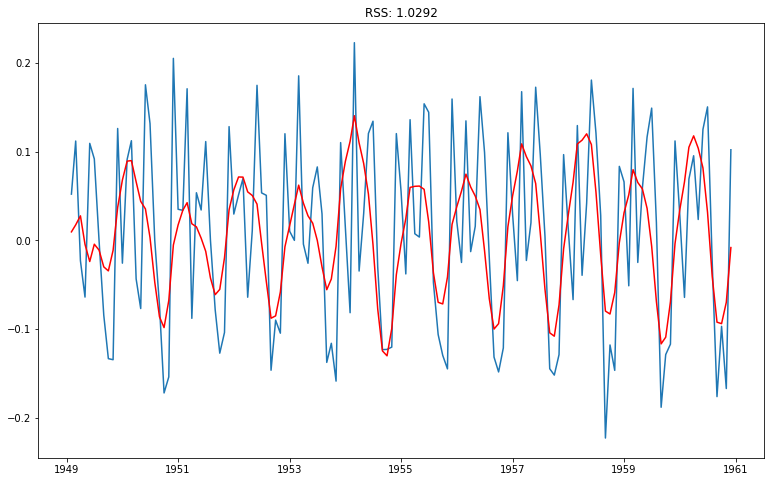

In [183]:
model = ARIMA(df_trend_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 
plt.figure(figsize=(13,8))
plt.plot(ts_log_diff)

plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff['#Passengers'])**2))

# Taking it back to original scale


In [185]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


#### From above we can realise that we are missing the first number, that is 1949-01-01 this is because we took a lag of 1 and also we have to convert the values above to log scale this will be done with a cumsum()

In [188]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())


Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


#### Now taking the values back to the original scale

In [194]:
predictions_ARIMA_log = pd.Series(df_trend_log['#Passengers'].iloc[0], index=df_trend_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773240
1949-05-01    4.768720
dtype: float64

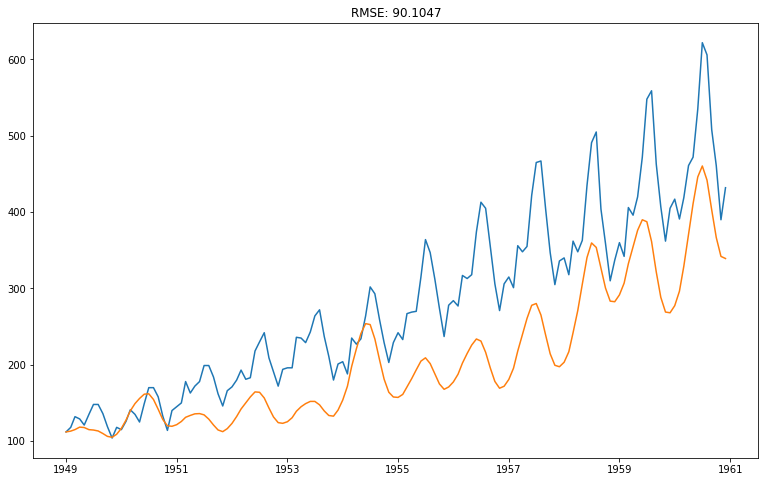

In [213]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(13,8))
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df['#Passengers'])**2)/len(df)))

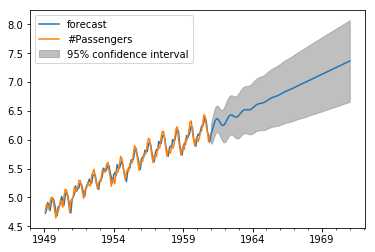

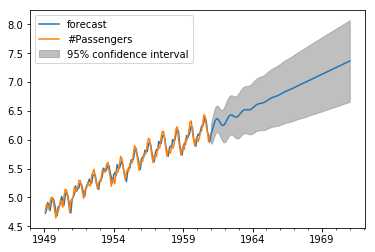

In [224]:
#fig, ax = plt.subplots()
# the size of A4 paper
#fig.set_size_inches(10, 5)

results_ARIMA.plot_predict(1,264)
#figure(figsize=(13,8))
#results_ARIMA.forecast(steps=12)